# Importing Needed Libraries

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
from statistics import mean
from matplotlib import pyplot as plt
%matplotlib widget
import seaborn as sns
import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import LearningCurveDisplay
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

# Importing the dataset

In [2]:
# Importing the dataset

df = pd.read_csv('international_matches.csv')
pd.set_option('display.max_columns', None)

# Data Exploration

In [3]:
# getting the first 4 rows of the data

df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,country,neutral_location,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,1,Friendly,Maceió,Brazil,False,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,0,FIFA World Cup qualification,Quito,Ecuador,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,0,Friendly,Conakry,Guinea,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# getting the last 4 rows of the data

df.tail()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,country,neutral_location,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,1,UEFA Nations League,Chișinău,Moldova,False,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,2,UEFA Nations League,Vaduz,Liechtenstein,False,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,0,Kirin Cup,Suita,Japan,True,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,3,Kirin Cup,Suita,Japan,False,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,1,Friendly,Seoul,Korea Republic,False,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


In [5]:
df.shape

(23921, 25)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

In [7]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

In [8]:
# checking for missing data

df.isna().sum()

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64

In [9]:
df.drop(columns='date').describe().T

,count,mean,std,min,25%,50%,75%,max
home_team_fifa_rank,23921.0,77.854688,52.355225,1.0,33.0,71.0,115.0,211.0
away_team_fifa_rank,23921.0,80.797375,53.232902,1.0,36.0,73.0,119.0,211.0
home_team_total_fifa_points,23921.0,323.401488,500.825725,0.0,0.0,0.0,547.0,2164.0
away_team_total_fifa_points,23921.0,315.453576,490.944273,0.0,0.0,0.0,523.0,2164.0
home_team_score,23921.0,1.609214,1.630127,0.0,0.0,1.0,2.0,31.0
away_team_score,23921.0,1.068266,1.263944,0.0,0.0,1.0,2.0,21.0
home_team_goalkeeper_score,8379.0,74.963838,8.212242,47.0,70.0,75.0,81.0,97.0
away_team_goalkeeper_score,8095.0,74.212477,8.225919,47.0,69.0,74.0,80.0,97.0
home_team_mean_defense_score,7787.0,74.903249,6.003114,52.8,71.0,75.2,78.8,91.8
home_team_mean_offense_score,8510.0,75.818743,6.268416,53.3,71.7,75.7,80.0,93.0


In [10]:
# converting date column to datetime format

df['date'] = pd.to_datetime(df['date'])

In [11]:
# getting latest fifa rankingking of teams

home_rank = df[['date','home_team','home_team_fifa_rank']].rename(columns={'home_team':'Team','home_team_fifa_rank':'Rank'})
away_rank = df[['date','away_team','away_team_fifa_rank']].rename(columns={'away_team':'Team','away_team_fifa_rank':'Rank'})
team_rank =  pd.concat([home_rank, away_rank])

fifa_rank  = team_rank.sort_values(['Team', 'date'], ascending=[True, False])
fifa_rank['row_number'] = fifa_rank.groupby('Team').cumcount()+1
fifa_rank_top = fifa_rank[fifa_rank['row_number']==1].drop('row_number',axis=1).nsmallest(5, 'Rank')

fifa_rank_top.reset_index(drop=True)

,date,Team,Rank
0,2022-06-06,Brazil,1
1,2022-06-14,Belgium,2
2,2022-06-13,France,3
3,2022-06-05,Argentina,4
4,2022-06-14,England,5


<Axes: title={'center': 'Latest FIFA Rankings'}, xlabel='Team', ylabel='Rank'>

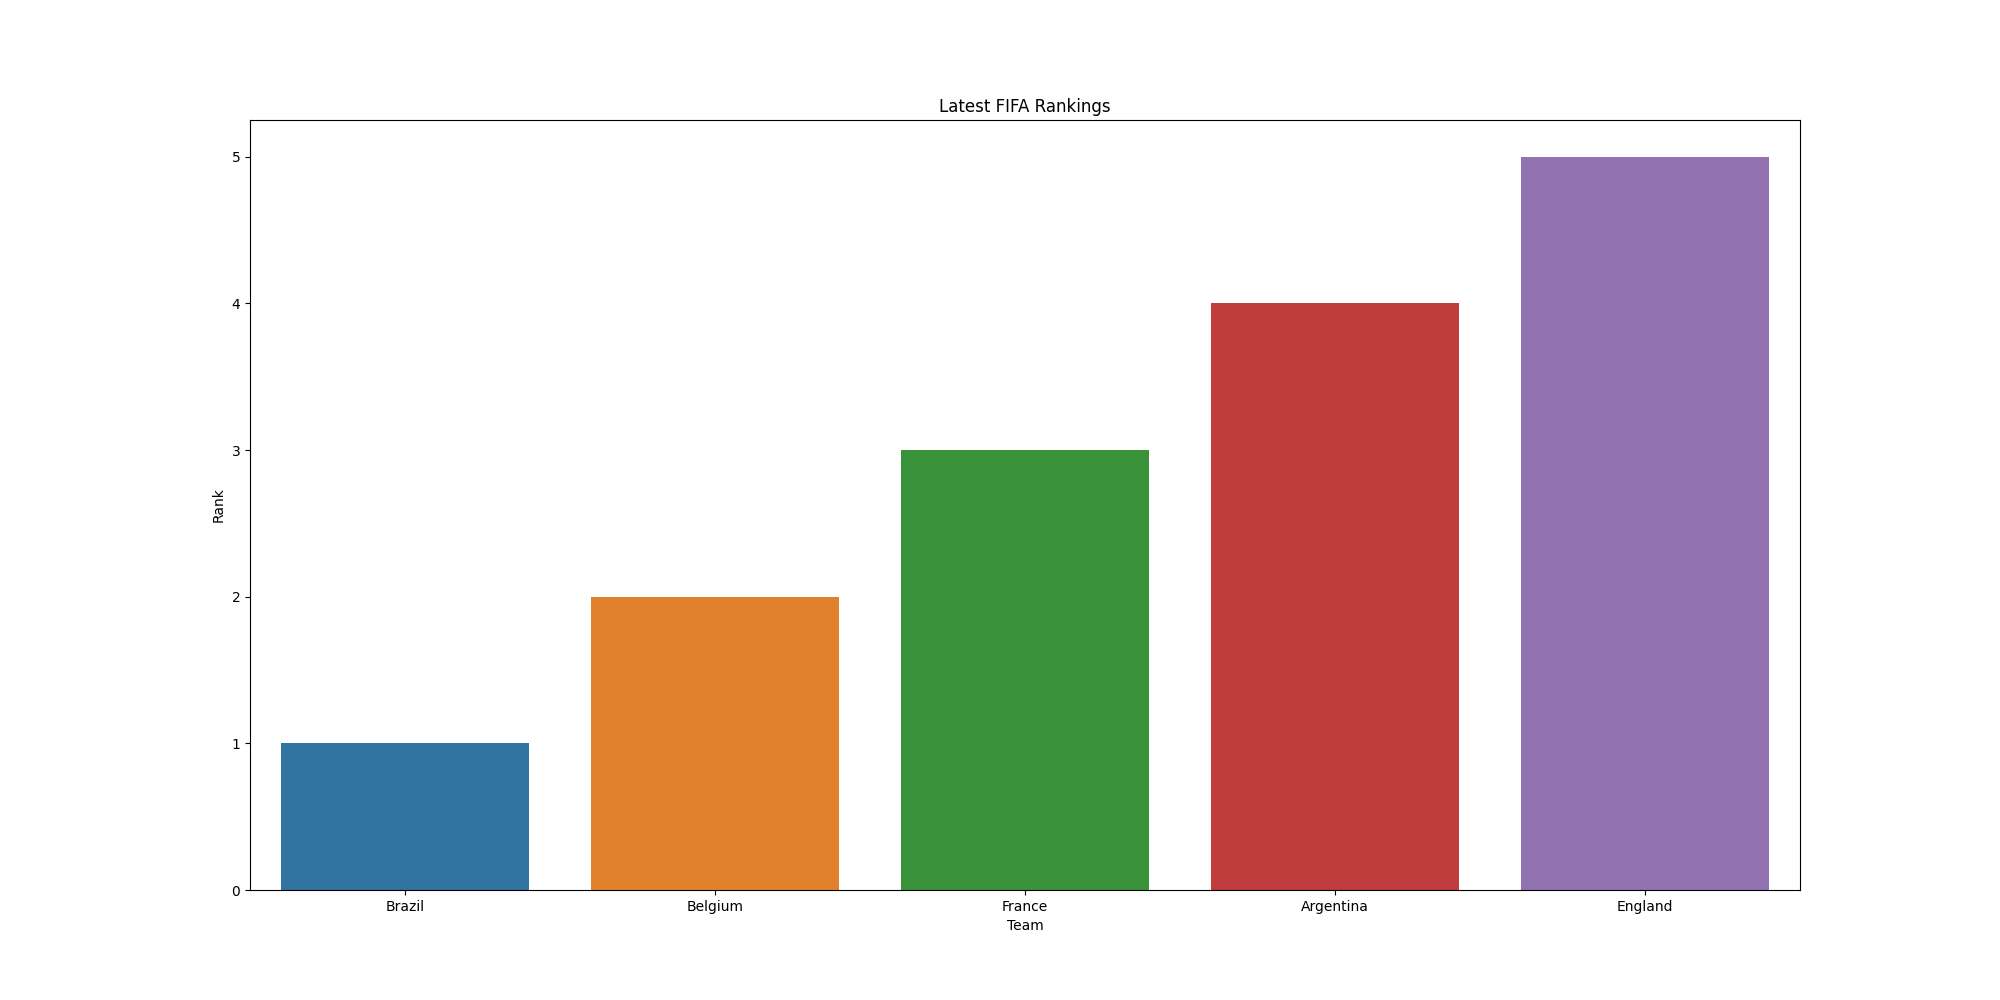

In [12]:
# displaying top 5 fifa ranked teams

plt.figure(figsize=(20,10))
plt.title("Latest FIFA Rankings")
sns.barplot(data=fifa_rank_top, x='Team',y='Rank')

# Data Preprocessing and Feature Engineering

In [13]:
# replacing null data

df.fillna(0, inplace = True)

In [14]:
# dropping all friendly games from data

df.drop(df[df.tournament == 'Friendly'].index, inplace = True)

In [15]:
# generating new feature rank difference

df['fifa_rank_difference'] = abs(df['home_team_fifa_rank'] - df['away_team_fifa_rank'])

In [16]:
# encoding away_team category

df['away_team_code'] = df['away_team'].astype('category').cat.codes

In [17]:
# dropping the result colum, it will be used as our target

df['result'] = (df['home_team_result'] == 'Win').astype('int')

In [18]:
# dropping all unneeded features

df.drop(columns=['home_team_continent', 'away_team_continent', 'city', 'country', 
                 'neutral_location', 'shoot_out', 'tournament', 'home_team_result', 
                 'home_team_score', 'away_team_score'], inplace = True)

In [19]:
df.reset_index(drop=True, inplace = True)

In [20]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_team_fifa_rank',
       'away_team_fifa_rank', 'home_team_total_fifa_points',
       'away_team_total_fifa_points', 'home_team_goalkeeper_score',
       'away_team_goalkeeper_score', 'home_team_mean_defense_score',
       'home_team_mean_offense_score', 'home_team_mean_midfield_score',
       'away_team_mean_defense_score', 'away_team_mean_offense_score',
       'away_team_mean_midfield_score', 'fifa_rank_difference',
       'away_team_code', 'result'],
      dtype='object')

# Model Selection and Training

In [21]:
# setting features needed for prediction

features = ['home_team_fifa_rank', 'away_team_fifa_rank', 'home_team_total_fifa_points', 'away_team_total_fifa_points', 
            'home_team_goalkeeper_score', 'away_team_goalkeeper_score', 'home_team_mean_defense_score', 
            'home_team_mean_offense_score', 'home_team_mean_midfield_score', 'away_team_mean_defense_score', 
            'away_team_mean_offense_score', 'away_team_mean_midfield_score', 'away_team_code']

The train data is gotten from all matches prior to 2020-010-01 and the test data is gotten from all matches after 2020-01-01

In [22]:
# train test split by date

train = df[df['date'] < '2020-01-01']
test = df[df['date'] > '2020-01-01']

In [23]:
X_train = train[features]
y_train = train['result']

In [24]:
X_test = test[features]
y_test = test['result']

I use a for loop to iterate of a choice of 3 models to get the most suitable model for the task. This saves time rather than doing for each model separately.
We fit each model using the training data. We then get our predictions and our chosen metrics.
Preds an array of 0's and 1's, where 1 is a prediction the home team will win and 0 is a prediction it will lose.

In [25]:
# calling chosen models

models = {
    "Logreg": LogisticRegression(max_iter=20000),
    "RNN": MLPClassifier(),
    "RF": RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1),
}

Next, we check the accuracy of our predictions by comparing the actual target test wins and losses with the predictions. 
Let's first use the accuracy score to check how well our model performed. Then we use metrics like confusion matrix to get the most
suitable model.

The Accuracy score for the Logreg model is: 0.712
The Classification Report for the Logreg model is: 
              precision    recall  f1-score   support

           0       0.73      0.71      0.72       766
           1       0.69      0.71      0.70       694

    accuracy                           0.71      1460
   macro avg       0.71      0.71      0.71      1460
weighted avg       0.71      0.71      0.71      1460

The RMSE for the Logreg model is: 0.537


The Accuracy score for the RNN model is: 0.728
The Classification Report for the RNN model is: 
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       766
           1       0.72      0.71      0.71       694

    accuracy                           0.73      1460
   macro avg       0.73      0.73      0.73      1460
weighted avg       0.73      0.73      0.73      1460

The RMSE for the RNN model is: 0.521


The Accuracy score for the RF model is: 0.703
The Classification Re

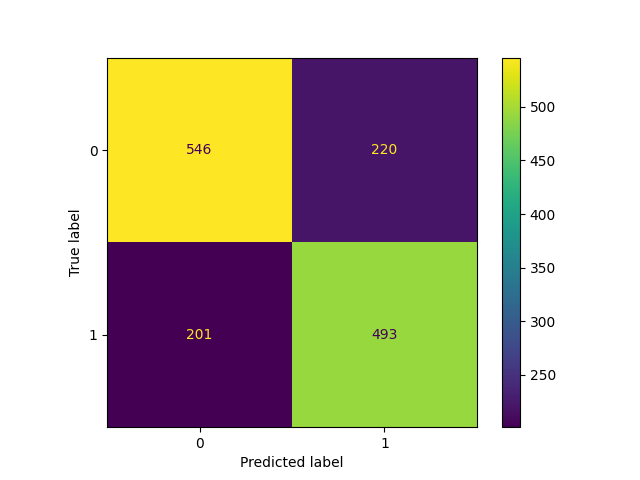

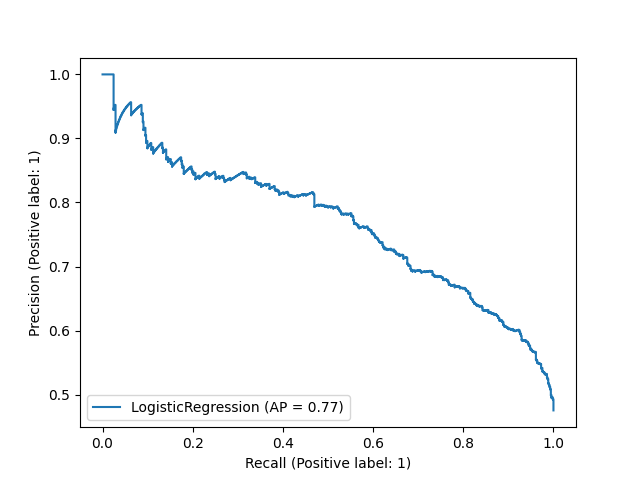

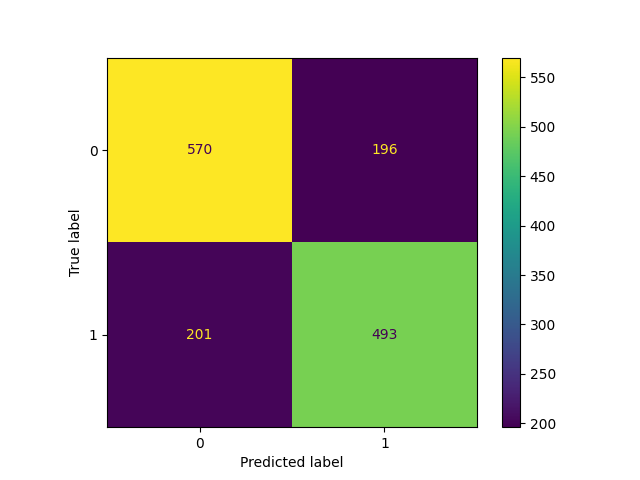

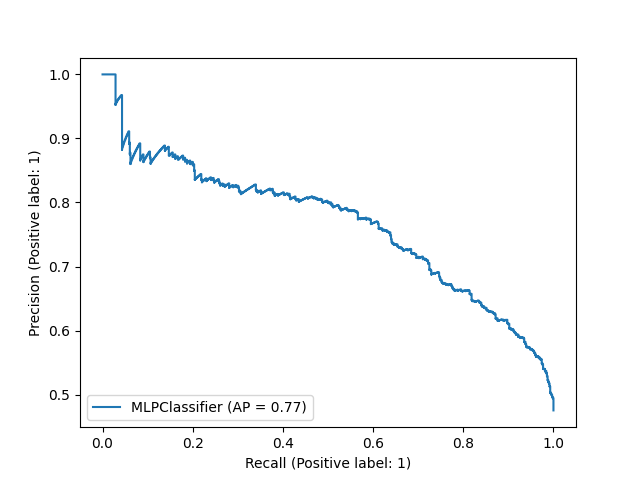

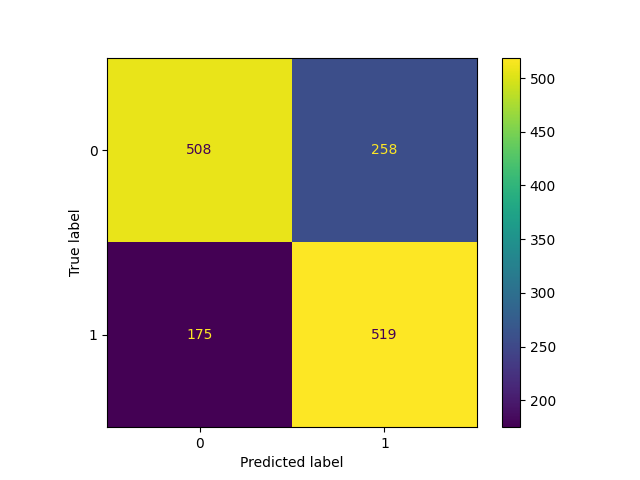

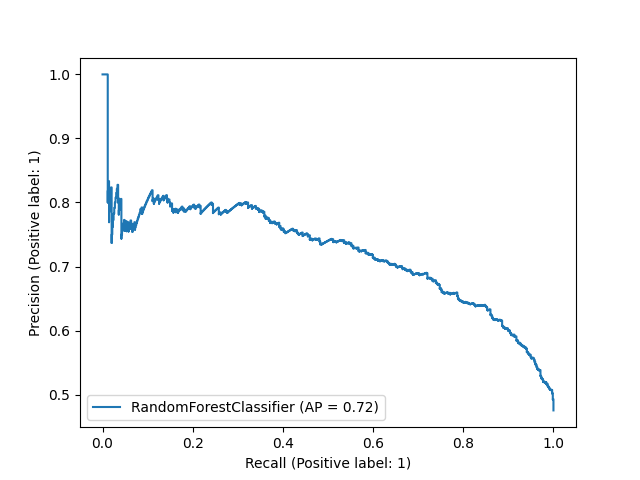

In [26]:
# iterating over models and evaluating using confusion matrix, precision recall, RMSE, accuracy score and classification report.

for x, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accu_score = accuracy_score(y_test, pred)
    rmse = mean_squared_error(y_test, pred, squared = False)
    print(f'The Accuracy score for the {x} model is: {round(accu_score, 3)}')
    print(f'The Classification Report for the {x} model is: \n{classification_report(y_test, pred)}')
    print(f'The RMSE for the {x} model is: {round(rmse, 3)}\n\n')
    cm = ConfusionMatrixDisplay.from_predictions(y_test, pred)
    pr = PrecisionRecallDisplay.from_estimator(model, X_test, y_test)

# Predictive Analysis: Generating new dataset

Here we will generate a new dataframe that only contains the 32 teams playing in the tournament.

In [27]:
# preparing new dataset for predictive analysis

home_columns = ['date', 'home_team', 'home_team_fifa_rank', 'home_team_total_fifa_points', 
        'home_team_goalkeeper_score', 'home_team_mean_defense_score', 
        'home_team_mean_offense_score', 'home_team_mean_midfield_score']

In [28]:
# preparing new dataset for predictive analysis

away_columns = ['date', 'away_team', 'away_team_fifa_rank', 'away_team_total_fifa_points', 
        'away_team_goalkeeper_score', 'away_team_mean_defense_score', 
        'away_team_mean_offense_score', 'away_team_mean_midfield_score', 'away_team_code']

In [29]:
# dropping unneded features

df.drop(columns=['result', 'fifa_rank_difference'], inplace = True)

In [30]:
# The 32 FIFA World Cup 2022 participant teams.

fifa_wc_2022 = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands', 'England', 'IR Iran', 'USA', 'Wales', 'Argentina', 'Saudi Arabia', 
                'Mexico', 'Poland', 'France', 'Australia', 'Denmark', 'Tunisia', 'Spain', 'Costa Rica', 'Germany', 'Japan', 'Belgium', 
                'Canada', 'Morocco', 'Croatia', 'Brazil', 'Serbia', 'Switzerland', 'Cameroon', 'Portugal', 'Ghana', 'Uruguay', 'Korea Republic']

In [31]:
# creating new dataframe containing only the 32 participating teams.

home_stats = []
away_stats = []
for team in fifa_wc_2022:
    home_team_info = df[df['home_team'] == team].sort_values(['date'], ascending = False)[:1]
    away_team_info = df[df['away_team'] == team].sort_values(['date'], ascending = False)[:1]
    home_team_info.drop(columns=away_columns, inplace = True)
    away_team_info.drop(columns=home_columns, inplace = True)
    home_stats.append(home_team_info)
    away_stats.append(away_team_info)

In [32]:
home_stats = pd.concat(home_stats).reset_index(drop=True)

In [33]:
away_stats = pd.concat(away_stats).reset_index(drop=True)

In [34]:
home_stats['tmp'] = 1
away_stats['tmp'] = 1

# Prediction

The function takes the chosen model as an argument. It then filters, iterate over the new dataset and pits every team against one another.
After running the model returns 1 if the home team wins or 0 if the home team loses.
For every match won, the home team gets 100 points and 0 points for loss, then the percentage win is calculated against the total possible points of 3100.
Hence, we get the win probability of each team.

In [35]:
results = []

I created a data frame of each team in the tournament as the home team, and have them play against every other team, i create a new dataframe
of both teams them simulate a match between them using the model and get the result of the match.
The result of the match is then stored in another new dataframe.

In [36]:
# defining function for prediction

def matches(model):
    for x in range(32):
        country = home_stats.iloc[x].home_team
        y_stats = away_stats.drop(away_stats[away_stats.away_team == country].index)
        score = []
        count = 0
        for y in range(len(y_stats)):
            country_b = y_stats.iloc[y].away_team
            match = pd.merge(home_stats.iloc[x].to_frame().T, y_stats.iloc[y].to_frame().T, on='tmp')
            match.drop('tmp', axis=1, inplace=True)
            result = model.predict(match[features])
            if result == 1:
                win = 100
                count += 1
            else:
                win = 0
            score.append(win)
        win_probability = round((sum(score)/3100) * 100, 2)
        r_frame = home_stats.iloc[x].to_frame().T
        r_frame['win_probability'] = win_probability
        results.append(r_frame)
        print(f'The probability of {country} winning the FIFA World Cup 2022 is: {win_probability}%')

In [37]:
# Running the function

reg = models['Logreg']
reg.fit(X_train, y_train)
matches(reg)

The probability of Qatar winning the FIFA World Cup 2022 is: 0.0%
The probability of Ecuador winning the FIFA World Cup 2022 is: 6.45%
The probability of Senegal winning the FIFA World Cup 2022 is: 29.03%
The probability of Netherlands winning the FIFA World Cup 2022 is: 48.39%
The probability of England winning the FIFA World Cup 2022 is: 51.61%
The probability of IR Iran winning the FIFA World Cup 2022 is: 29.03%
The probability of USA winning the FIFA World Cup 2022 is: 32.26%
The probability of Wales winning the FIFA World Cup 2022 is: 29.03%
The probability of Argentina winning the FIFA World Cup 2022 is: 54.84%
The probability of Saudi Arabia winning the FIFA World Cup 2022 is: 3.23%
The probability of Mexico winning the FIFA World Cup 2022 is: 48.39%
The probability of Poland winning the FIFA World Cup 2022 is: 25.81%
The probability of France winning the FIFA World Cup 2022 is: 54.84%
The probability of Australia winning the FIFA World Cup 2022 is: 9.68%
The probability of Denm

# Results

Here we create a new dataframe from our results.

In [38]:
results = pd.concat(results).drop('tmp', axis=1)

In [39]:
results = results.rename(columns={'home_team':'team', 'home_team_fifa_rank':'team_fifa_rank', 'home_team_total_fifa_points':'team_total_fifa_points', 
                            'home_team_goalkeeper_score':'team_goalkeeper_score', 'home_team_mean_defense_score':'team_mean_defense_score', 
                            'home_team_mean_offense_score':'team_mean_offense_score', 'home_team_mean_midfield_score':'team_mean_midfield_score'})

In [40]:
results  = results.sort_values(['win_probability'], ascending=[False])
results.reset_index(drop=True, inplace = True)

Here i use the results dataframe to get the win probability of each team and also, each teams attacking metrics, defensive metrics and midfield metrics.

In [41]:
prob = results.tail(10)

In [42]:
prob

,team,team_fifa_rank,team_total_fifa_points,team_goalkeeper_score,team_mean_defense_score,team_mean_offense_score,team_mean_midfield_score,win_probability
22,Poland,26,1544,87.0,75.2,84.7,75.8,25.81
23,Costa Rica,31,1503,88.0,71.5,70.3,69.2,12.90
24,Canada,38,1479,76.0,69.2,73.0,78.0,9.68
25,Tunisia,35,1499,0.0,70.8,72.3,74.0,9.68
26,Australia,42,1462,77.0,72.0,72.3,73.5,9.68
27,Cameroon,38,1480,67.0,76.8,77.7,75.0,9.68
28,Ecuador,44,1458,71.0,73.5,76.0,74.5,6.45
29,Ghana,60,1387,74.0,75.5,76.0,78.2,3.23
30,Saudi Arabia,53,1433,70.0,72.8,67.7,72.8,3.23
31,Qatar,51,1431,0.0,0.0,0.0,0.0,0.00


In [43]:
plt.close()
plt.cla()
plt.clf()

<Axes: title={'center': 'Team Win Probability'}, xlabel='team', ylabel='win_probability'>

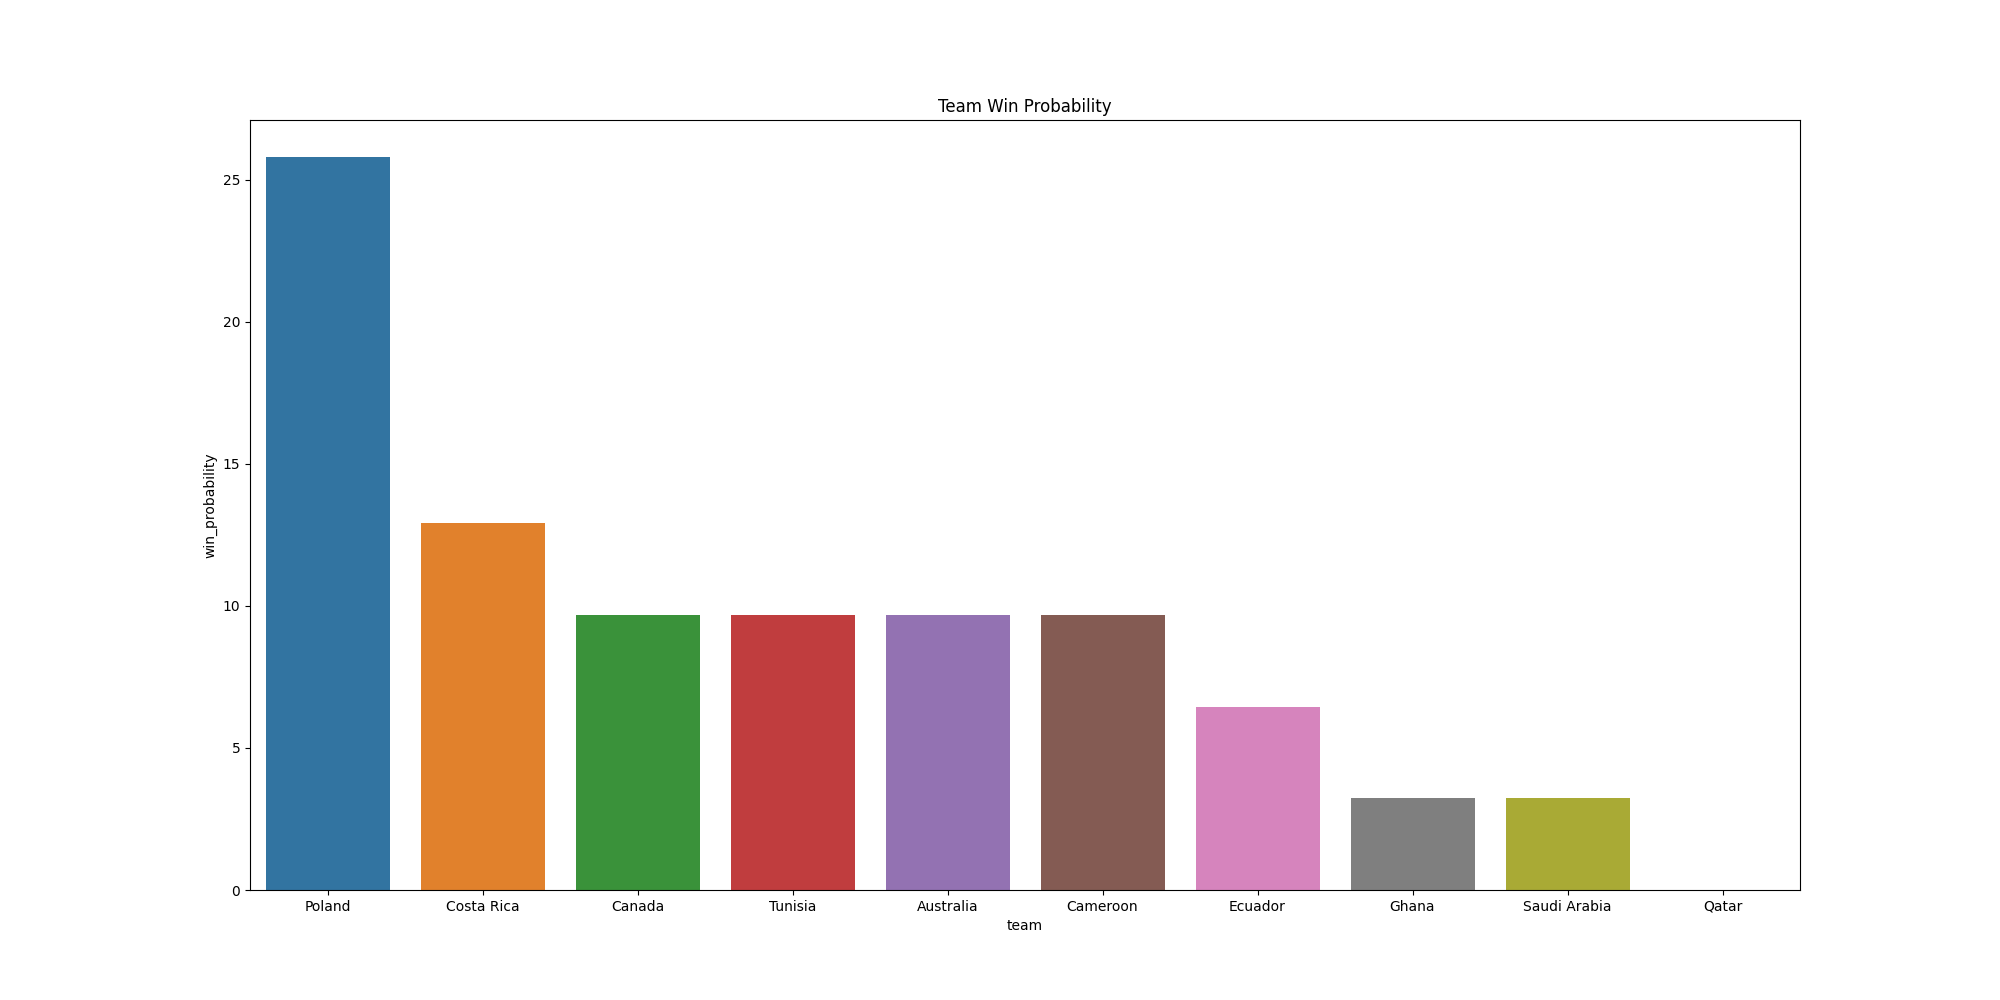

In [44]:
plt.figure(figsize=(20,10))
plt.title("Team Win Probability")
sns.barplot(data=prob, x='team',y='win_probability')

In [45]:
results['defense score'] = ((results.team_goalkeeper_score + results.team_mean_defense_score)/2)

In [46]:
defense = results.sort_values(['defense score'], ascending=[False]).head(6)

<Axes: title={'center': 'Best Defencive Team'}, xlabel='team', ylabel='defense score'>

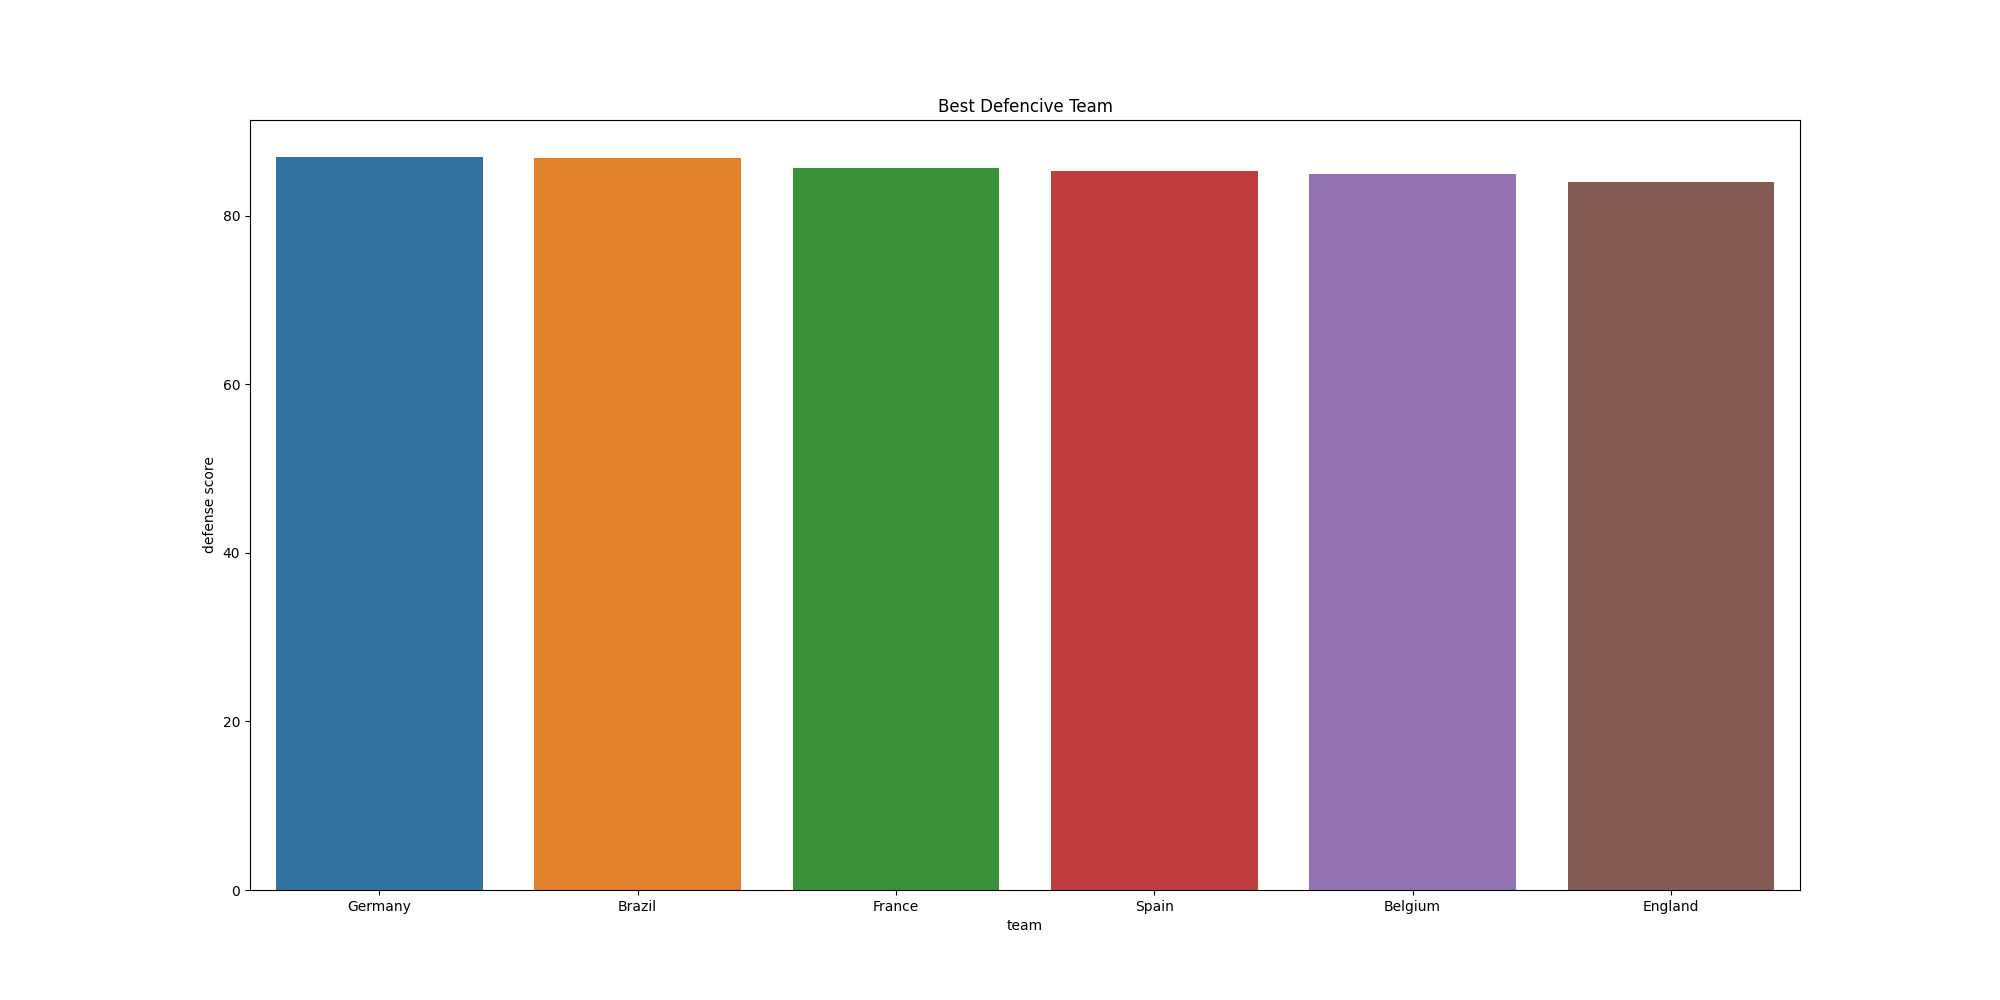

In [47]:
plt.figure(figsize=(20,10))
plt.title("Best Defencive Team")
sns.barplot(data=defense, x='team',y='defense score')

In [48]:
results['offence score'] = results['team_mean_offense_score']

In [49]:
offense = results.sort_values(['offence score'], ascending=[False]).head(6)

<Axes: title={'center': 'Best Offencive Team'}, xlabel='team', ylabel='offence score'>

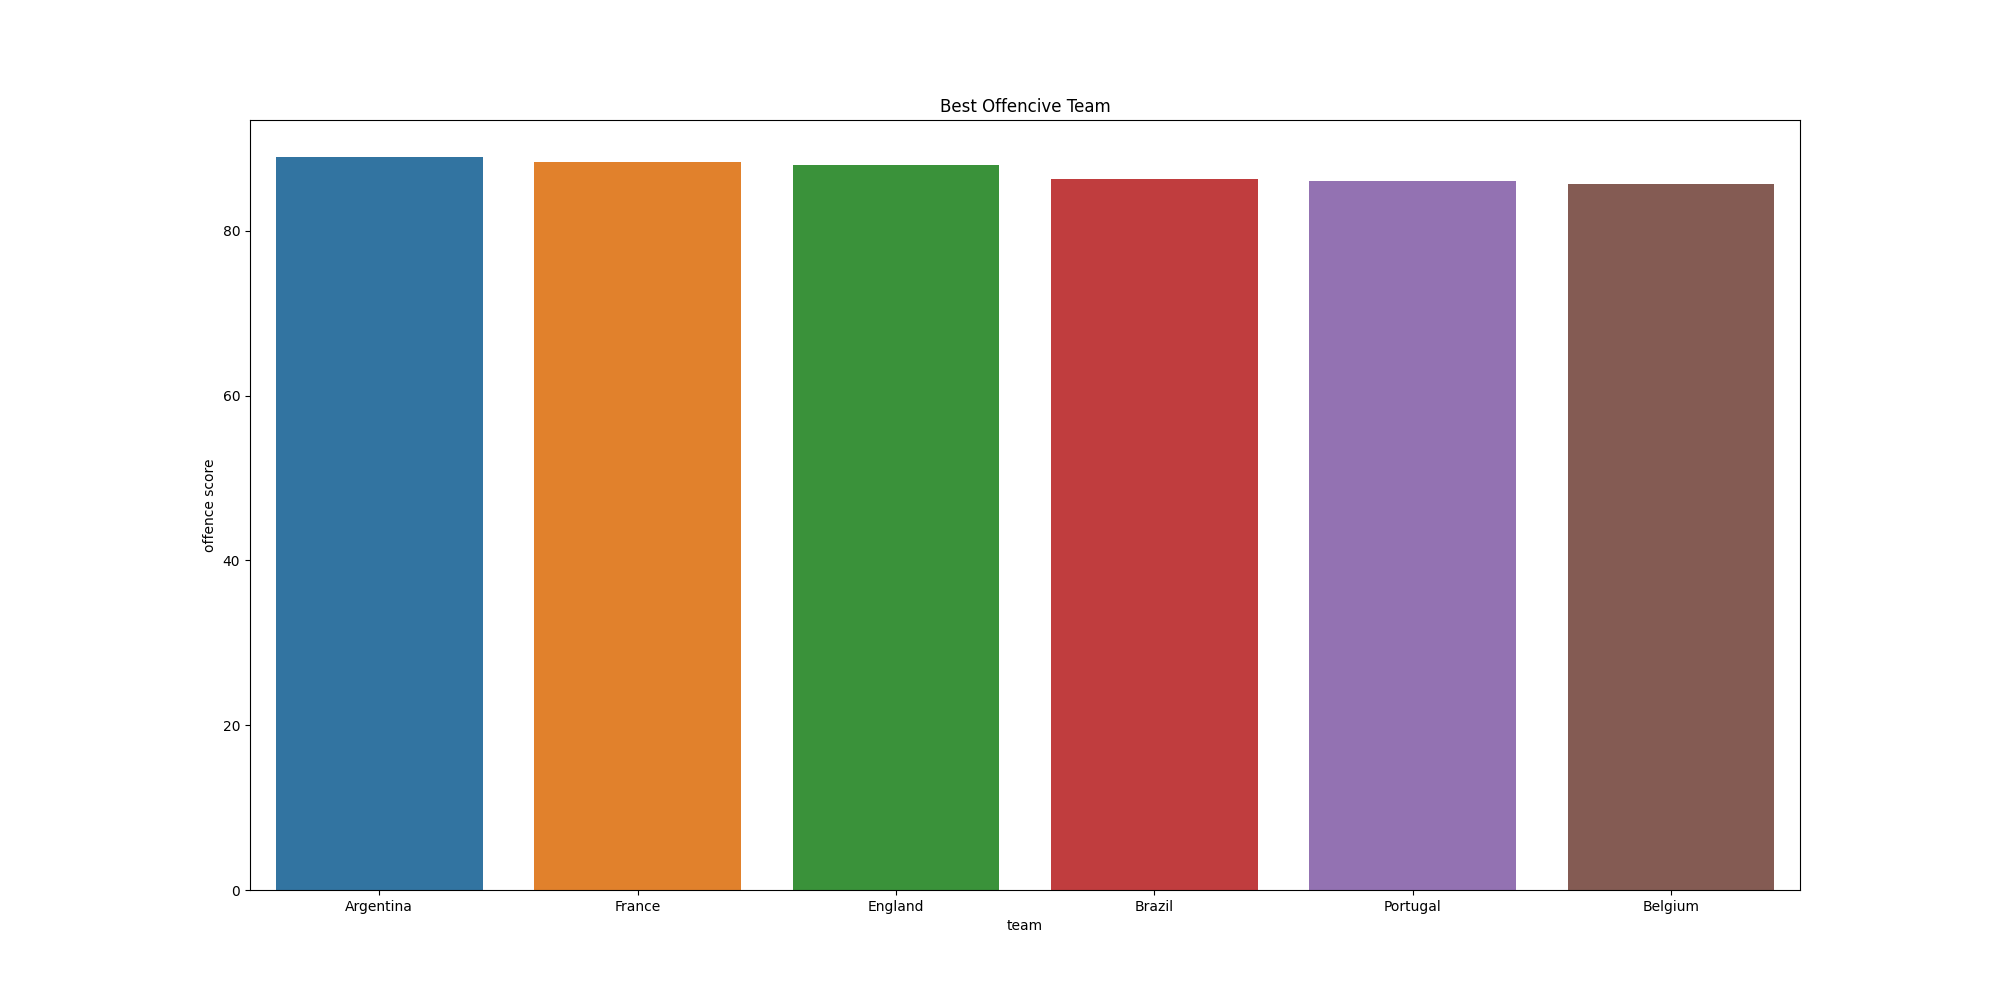

In [50]:
plt.figure(figsize=(20,10))
plt.title("Best Offencive Team")
sns.barplot(data=offense, x='team',y='offence score')

In [51]:
midfield = results.sort_values(['team_mean_midfield_score'], ascending=[False]).head(6)

In [52]:
midfield = midfield.rename(columns={'team_mean_midfield_score': 'Midfield Score'})

<Axes: title={'center': 'Best Midfield Team'}, xlabel='team', ylabel='Midfield Score'>

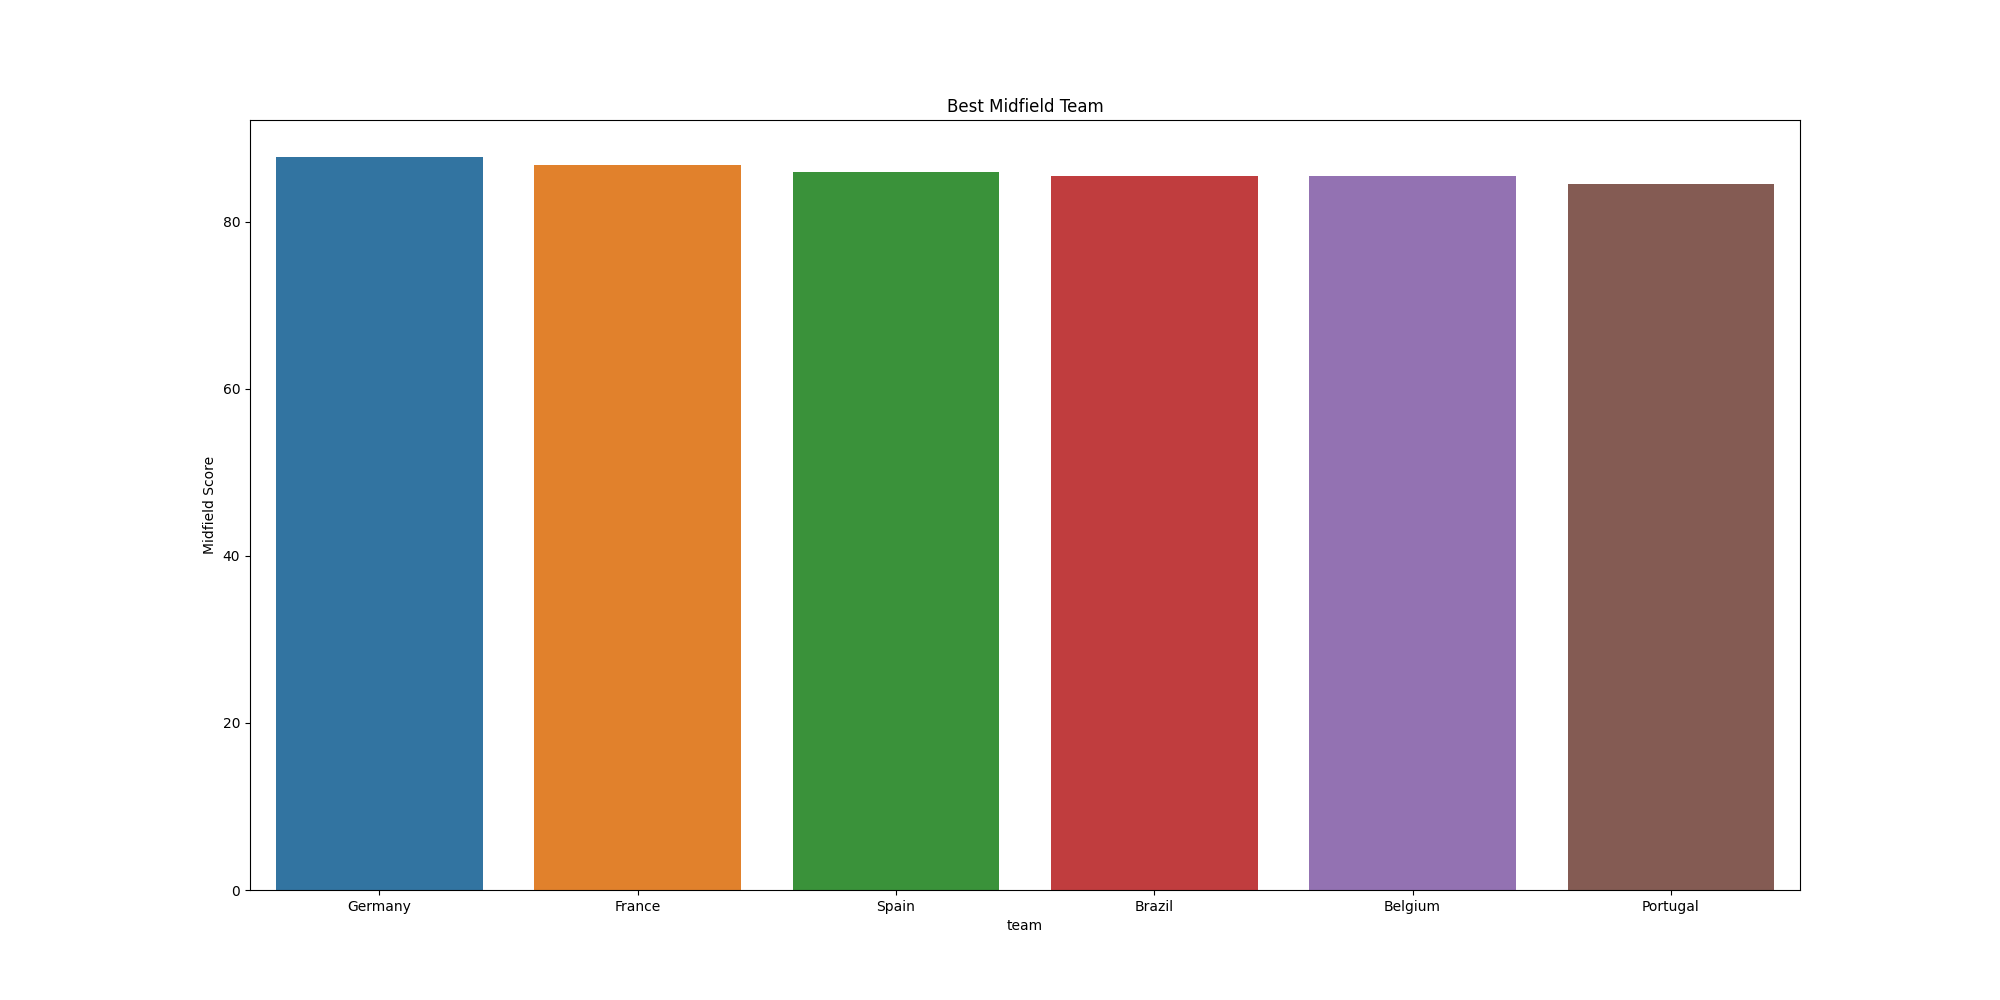

In [53]:
plt.figure(figsize=(20,10))
plt.title("Best Midfield Team")
sns.barplot(data=midfield, x='team',y='Midfield Score')